In [ ]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading & Explorating Data



In [ ]:
data=pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.shape

(13320, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#Data Cleaning & Preprocessing


In [ ]:
data['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
3rd Stage Raja Rajeshwari Nagar,1
Chuchangatta Colony,1
"Electronic City Phase 1,",1


#Exploratory Data Analysis(EDA)

In [ ]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

#Graph of price vs area

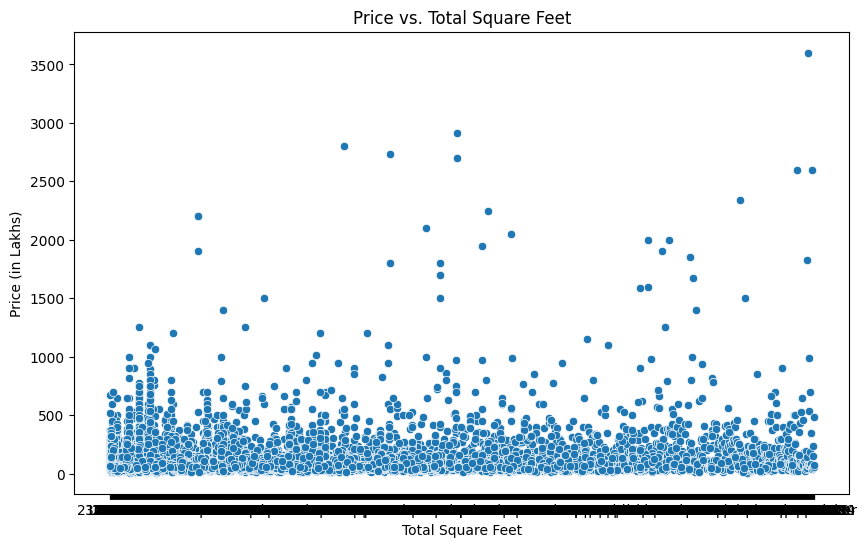

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=data)
plt.title('Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in Lakhs)')
plt.show()

#Graph of price vs BHK

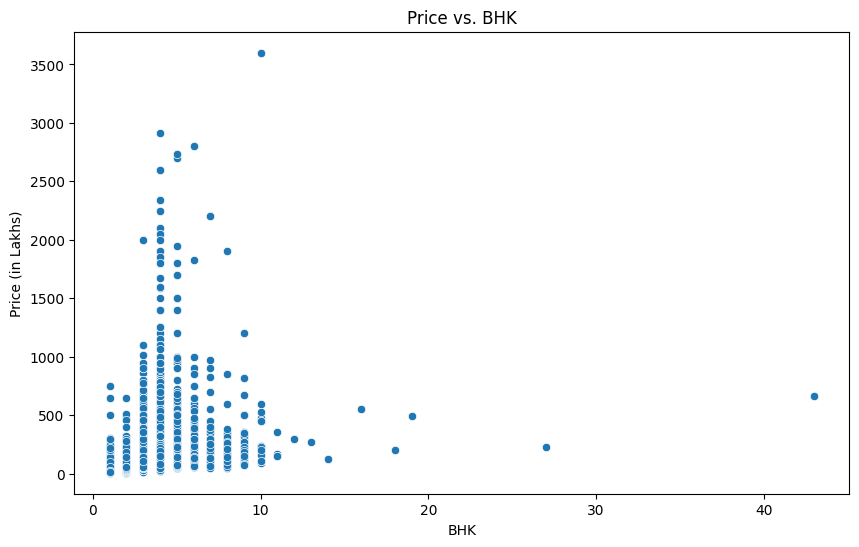

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bhk', y='price', data=data)
plt.title('Price vs. BHK')
plt.xlabel('BHK')
plt.ylabel('Price (in Lakhs)')
plt.show()

#Graph of price vs location

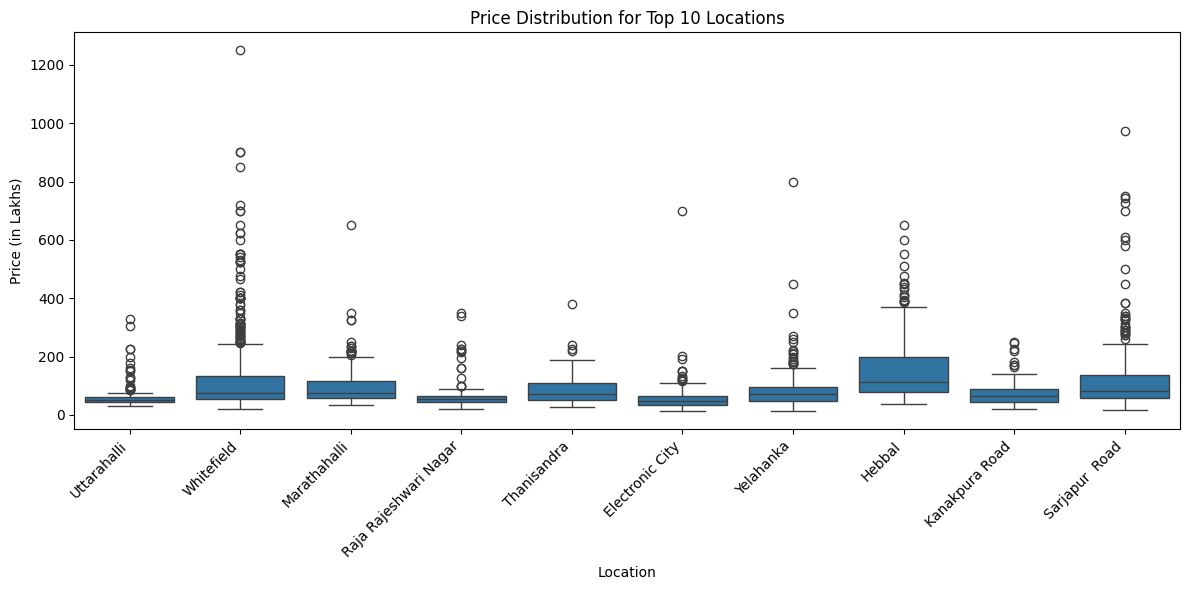

In [ ]:
top_locations = data['location'].value_counts().head(10).index
data_top_locations = data[data['location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='price', data=data_top_locations)
plt.title('Price Distribution for Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Price (in Lakhs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Graph of location vs bhk

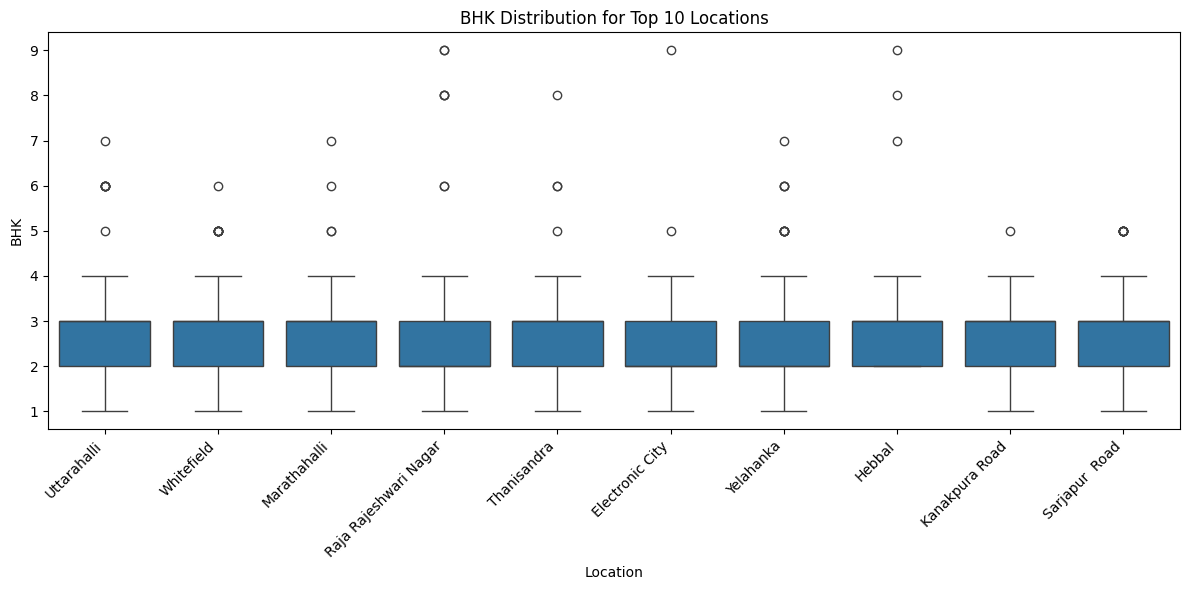

In [ ]:
top_locations = data['location'].value_counts().head(10).index
data_top_locations = data[data['location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='bhk', data=data_top_locations)
plt.title('BHK Distribution for Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('BHK')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Graph of area vs availability

/tmp/ipython-input-4109257626.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


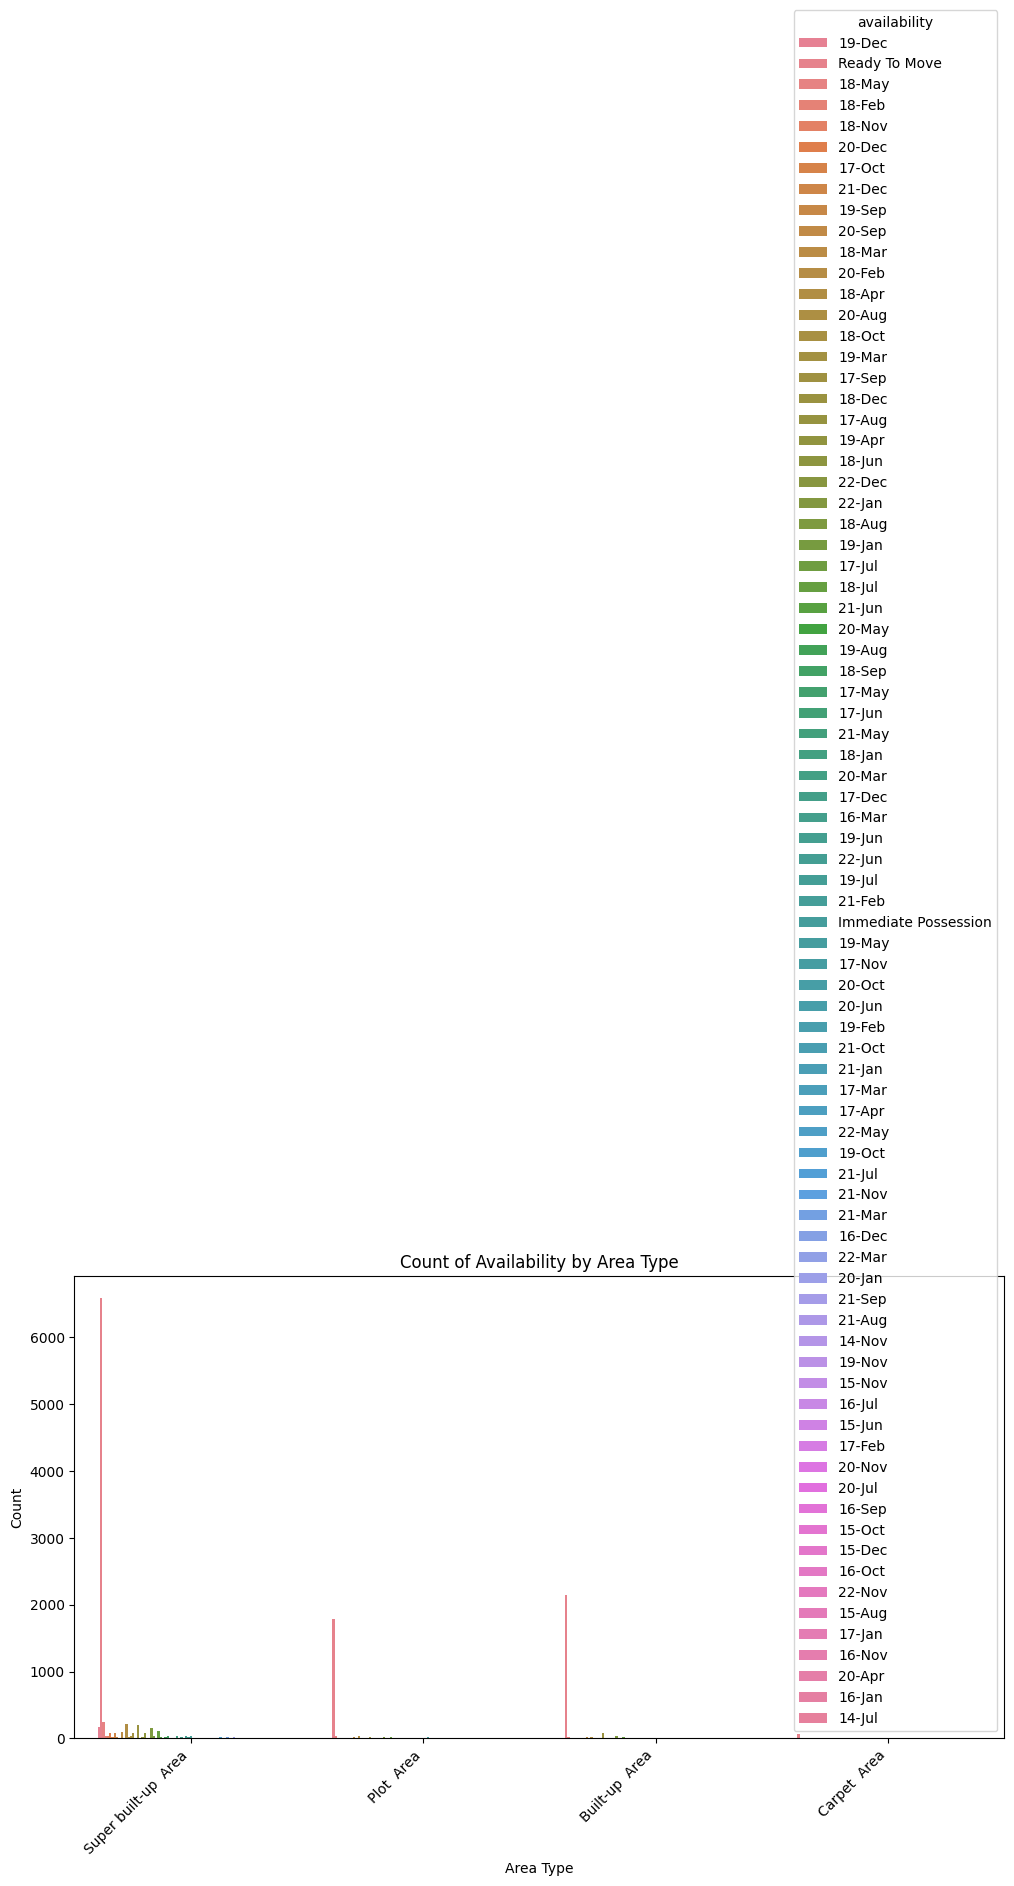

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='area_type', hue='availability')
plt.title('Count of Availability by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Graph of price vs bath and balcony

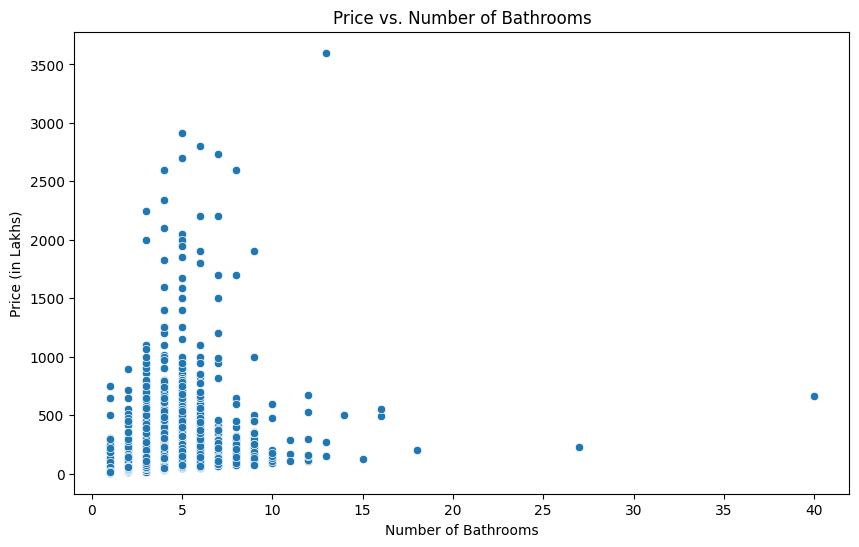

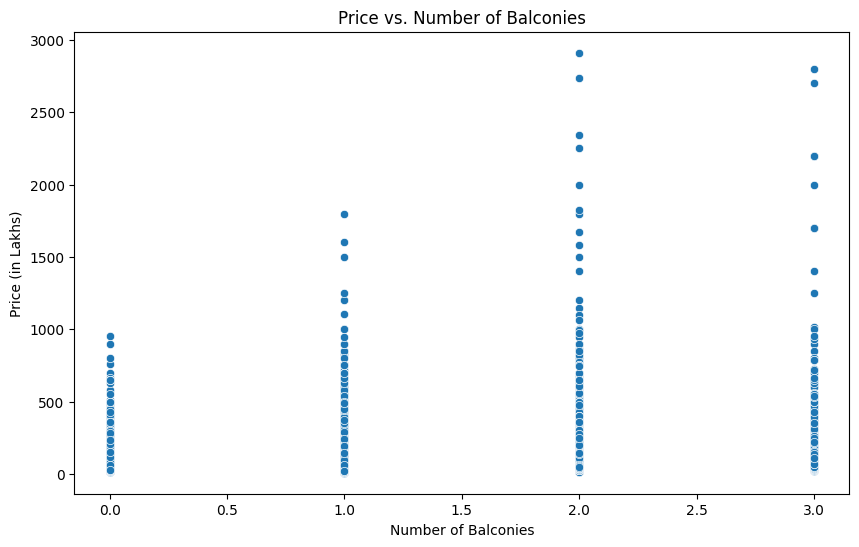

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bath', y='price', data=data)
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in Lakhs)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='balcony', y='price', data=data)
plt.title('Price vs. Number of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Price (in Lakhs)')
plt.show()

#Feature Engineering

price per sqft

In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,4250.000000


Remove highly skewed or redundant columns


In [ ]:
# Drop the 'society' column due to a high number of missing values
data = data.drop('society', axis=1)

# Check the value counts of categorical columns to identify potential redundancy
print(data['area_type'].value_counts())
print(data['availability'].value_counts())
print(data['location'].value_counts())

# Based on the value counts, 'availability' might also be a candidate for removal
# or further processing if most values are 'Ready To Move'.
# 'location' has many unique values and will need dimensionality reduction later.

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64


 #Model Building

#Building Linear Regression

# Task
Train a Linear Regression model on the dataset, handling missing values, converting categorical features, and splitting the data into training and testing sets. Evaluate the model's performance.

## Handle missing values

### Subtask:
Address missing values in the dataset using appropriate techniques.


**Reasoning**:
Calculate and display the number of missing values for each column to understand the extent of missing data.



In [ ]:
print(data.isnull().sum())

area_type           0
availability        0
location            1
size               16
total_sqft         46
bath               73
balcony           609
price               0
price_per_sqft     46
dtype: int64


**Reasoning**:
Based on the missing value counts, the 'bath' column has a small number of missing values (73 out of 13320), so imputing with the median is a reasonable approach. The 'balcony' column has a larger number of missing values (609), but still a relatively small percentage, so imputing with the median is also suitable to preserve as many rows as possible. After imputation, verify that missing values in these columns are handled.



In [ ]:
data['bath'] = data['bath'].fillna(data['bath'].median())
data['balcony'] = data['balcony'].fillna(data['balcony'].median())
print(data.isnull().sum())

area_type          0
availability       0
location           1
size              16
total_sqft        46
bath               0
balcony            0
price              0
price_per_sqft    46
dtype: int64


## Convert categorical features

### Subtask:
Convert categorical features into a numerical format suitable for linear regression.


**Reasoning**:
Identify and convert categorical features 'area_type', 'availability', and 'location' using one-hot encoding, and extract numerical 'bhk' from 'size'.



In [ ]:
# Identify categorical columns
categorical_cols = ['area_type', 'availability', 'location']

# Apply one-hot encoding to categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Extract numerical BHK from 'size' column
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]) if pd.notnull(x) else None)

# Drop the original 'size' column
data = data.drop('size', axis=1)

# Display the first few rows of the modified DataFrame
display(data.head())

,total_sqft,bath,balcony,price,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Nov,availability_15-Aug,...,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled,bhk
0,1056.0,2.0,1.0,39.07,3699.810606,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,2.0
1,2600.0,5.0,3.0,120.00,4615.384615,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,4.0
2,1440.0,2.0,3.0,62.00,4305.555556,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3.0
3,1521.0,3.0,1.0,95.00,6245.890861,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,3.0
4,1200.0,2.0,1.0,51.00,4250.000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,2.0


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into features (X) and target variable (y), then use train_test_split to create training and testing sets.



In [ ]:
X = data.drop('price', axis=1)
y = data['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10656, 1392)
Shape of X_test: (2664, 1392)
Shape of y_train: (10656,)
Shape of y_test: (2664,)


## Train linear regression model

### Subtask:
Train a Linear Regression model on the training data.


**Reasoning**:
Import the LinearRegression class, instantiate it, and fit the model to the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Reasoning**:
The traceback indicates that there are still NaN values in the training data (X_train). I need to check for and handle these missing values before training the Linear Regression model.



In [ ]:
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

total_sqft        34
price_per_sqft    34
bhk               14
dtype: int64


**Reasoning**:
Based on the previous output, there are still missing values in 'total_sqft', 'price_per_sqft', and 'bhk' in the training data. I will impute these missing values with the median of their respective columns in the training set, and then fit the Linear Regression model.



In [ ]:
X_train['total_sqft'] = X_train['total_sqft'].fillna(X_train['total_sqft'].median())
X_train['price_per_sqft'] = X_train['price_per_sqft'].fillna(X_train['price_per_sqft'].median())
X_train['bhk'] = X_train['bhk'].fillna(X_train['bhk'].median())

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate model

### Subtask:
Evaluate the performance of the trained model.


**Reasoning**:
Impute missing values in the test set and then make predictions using the trained model and evaluate its performance by calculating and printing the MSE and R-squared scores.



In [ ]:
X_test['total_sqft'] = X_test['total_sqft'].fillna(X_test['total_sqft'].median())
X_test['price_per_sqft'] = X_test['price_per_sqft'].fillna(X_test['price_per_sqft'].median())
X_test['bhk'] = X_test['bhk'].fillna(X_test['bhk'].median())

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8711.180915189985
R-squared: 0.5908426141883347


## Summary:

### Data Analysis Key Findings

*   Initially, the 'bath' column had 73 missing values and the 'balcony' column had 609 missing values. After imputation with the median, these columns had no missing values.
*   Categorical features ('area\_type', 'availability', 'location') were successfully converted using one-hot encoding, and a 'bhk' feature was created from the 'size' column.
*   The dataset was split into training and testing sets with a 80/20 ratio, resulting in training data shapes of (10656, 1392) for features and (10656,) for the target, and testing data shapes of (2664, 1392) for features and (2664,) for the target.
*   During model training, it was identified that 'total\_sqft', 'price\_per\_sqft', and 'bhk' in the training set still contained missing values, which were then imputed with their medians.
*   The trained Linear Regression model achieved a Mean Squared Error of approximately 8711.18 and an R-squared score of approximately 0.591 on the test set.

### Insights or Next Steps

*   The R-squared score of 0.591 indicates that the model explains a moderate amount of the variance in house prices. Further feature engineering or exploring more complex models might improve performance.
*   Investigate the distribution of the 'total\_sqft', 'price\_per\_sqft', and 'bhk' features to understand why missing values persisted after initial handling and if a different imputation strategy would be more suitable.


#Building Decision Tree


Train and evaluate a Decision Tree Regressor model and compare its performance with a Linear Regression model.

## Import necessary libraries

### Subtask:
Import the Decision Tree Regressor from scikit-learn and evaluation metrics.


**Reasoning**:
Import the necessary libraries for building and evaluating a Decision Tree Regressor model.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Train decision tree model

### Subtask:
Train a Decision Tree Regressor model on the training data.


**Reasoning**:
Instantiate the Decision Tree Regressor model and fit it to the training data.



In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Evaluate model

### Subtask:
Evaluate the performance of the trained Decision Tree model using appropriate metrics.


**Reasoning**:
Impute missing values in the test set and then make predictions using the trained Decision Tree model and evaluate its performance by calculating and printing the MSE and R-squared scores.



In [ ]:
X_test['total_sqft'] = X_test['total_sqft'].fillna(X_test['total_sqft'].median())
X_test['price_per_sqft'] = X_test['price_per_sqft'].fillna(X_test['price_per_sqft'].median())
X_test['bhk'] = X_test['bhk'].fillna(X_test['bhk'].median())

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

Decision Tree Mean Squared Error: 862.0572429710961
Decision Tree R-squared: 0.9595098424211326


## Compare models

### Subtask:
Compare the performance of the Decision Tree model with the Linear Regression model.


**Reasoning**:
Print the evaluation metrics for both models and compare them.



In [ ]:
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\nDecision Tree Regression Performance:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")

print("\nComparison:")
if mse_dt < mse:
    print("The Decision Tree model has a lower Mean Squared Error, indicating better performance.")
else:
    print("The Linear Regression model has a lower Mean Squared Error, indicating better performance.")

if r2_dt > r2:
    print("The Decision Tree model has a higher R-squared score, indicating better performance.")
else:
    print("The Linear Regression model has a higher R-squared score, indicating better performance.")

Linear Regression Performance:
Mean Squared Error: 8711.180915189985
R-squared: 0.5908426141883347

Decision Tree Regression Performance:
Mean Squared Error: 862.0572429710961
R-squared: 0.9595098424211326

Comparison:
The Decision Tree model has a lower Mean Squared Error, indicating better performance.
The Decision Tree model has a higher R-squared score, indicating better performance.


## Summary:

### Data Analysis Key Findings

*   The Decision Tree Regression model achieved a Mean Squared Error (MSE) of approximately 862.06 and an R-squared score of approximately 0.96 on the test set.
*   The Linear Regression model achieved a Mean Squared Error (MSE) of approximately 8711.18 and an R-squared score of approximately 0.59.
*   The Decision Tree Regression model performed significantly better than the Linear Regression model, exhibiting a much lower MSE and a much higher R-squared score.

### Insights or Next Steps

*   The Decision Tree Regressor appears to be a more suitable model for this dataset compared to Linear Regression.
*   Further optimization of the Decision Tree model could be explored through hyperparameter tuning to potentially improve performance even more.


#Building Random Forest


Training a Random Forest model and evaluate its performance.

## Importing necessary libraries

### Subtask:
Import the RandomForestRegressor from scikit-learn and evaluation metrics.


**Reasoning**:
Import the necessary libraries for building and evaluating a Random Forest Regressor model.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Train random forest model

### Subtask:
Train a Random Forest Regressor model on the training data.


**Reasoning**:
Instantiate and train the Random Forest Regressor model using the training data.



In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#Comparing performance using RMSE, MAE, R²

## Evaluate model

### Subtask:
Evaluate the performance of the trained Random Forest model using appropriate metrics.


**Reasoning**:
Impute missing values in the test set and then make predictions using the trained Random Forest model and evaluate its performance by calculating and printing the MSE and R-squared scores.



In [ ]:
X_test['total_sqft'] = X_test['total_sqft'].fillna(X_test['total_sqft'].median())
X_test['price_per_sqft'] = X_test['price_per_sqft'].fillna(X_test['price_per_sqft'].median())
X_test['bhk'] = X_test['bhk'].fillna(X_test['bhk'].median())

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest Mean Squared Error: 374.76241049092897
Random Forest R-squared: 0.9823977013369601


## Compare models

### Subtask:
Compare the performance of the Random Forest model with the Linear Regression and Decision Tree models.


**Reasoning**:
Print the evaluation metrics for all three models and compare them to determine the best-performing model.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Linear Regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R-squared: {r2_dt}")

# Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared: {r2_rf}")

print("\nComparison:")
if mse_rf < mse_dt and mse_rf < mse:
    print("The Random Forest model has the lowest Mean Squared Error, indicating the best performance.")
elif mse_dt < mse_rf and mse_dt < mse:
    print("The Decision Tree model has the lowest Mean Squared Error, indicating better performance than Linear Regression and Random Forest.")
else:
    print("The Linear Regression model has the lowest Mean Squared Error, indicating better performance than Decision Tree and Random Forest.")

if rmse_rf < rmse_dt and rmse_rf < rmse:
    print("The Random Forest model has the lowest Root Mean Squared Error, indicating the best performance.")
elif rmse_dt < rmse_rf and rmse_dt < rmse:
    print("The Decision Tree model has the lowest Root Mean Squared Error, indicating better performance than Linear Regression and Random Forest.")
else:
    print("The Linear Regression model has the lowest Root Mean Squared Error, indicating better performance than Decision Tree and Random Forest.")

if mae_rf < mae_dt and mae_rf < mae:
    print("The Random Forest model has the lowest Mean Absolute Error, indicating the best performance.")
elif mae_dt < mae_rf and mae_dt < mae:
    print("The Decision Tree model has the lowest Mean Absolute Error, indicating better performance than Linear Regression and Random Forest.")
else:
    print("The Linear Regression model has the lowest Mean Absolute Error, indicating better performance than Decision Tree and Random Forest.")

if r2_rf > r2_dt and r2_rf > r2:
    print("The Random Forest model has the highest R-squared score, indicating the best performance.")
elif r2_dt > r2_rf and r2_dt > r2:
    print("The Decision Tree model has the highest R-squared score, indicating better performance than Linear Regression and Random Forest.")
else:
    print("The Linear Regression model has the highest R-squared score, indicating better performance than Decision Tree and Random Forest.")

Linear Regression Performance:
Mean Squared Error (MSE): 8711.180915189985
Root Mean Squared Error (RMSE): 93.33370728300675
Mean Absolute Error (MAE): 40.20861883790959
R-squared: 0.5908426141883347

Decision Tree Regression Performance:
Mean Squared Error (MSE): 862.0572429710961
Root Mean Squared Error (RMSE): 29.360811347289026
Mean Absolute Error (MAE): 4.378429054054054
R-squared: 0.9595098424211326

Random Forest Regression Performance:
Mean Squared Error (MSE): 374.76241049092897
Root Mean Squared Error (RMSE): 19.358781224315983
Mean Absolute Error (MAE): 2.589779016516516
R-squared: 0.9823977013369601

Comparison:
The Random Forest model has the lowest Mean Squared Error, indicating the best performance.
The Random Forest model has the lowest Root Mean Squared Error, indicating the best performance.
The Random Forest model has the lowest Mean Absolute Error, indicating the best performance.
The Random Forest model has the highest R-squared score, indicating the best performan

#Model Evaluation & Interpretation


## Business Insights from House Price Analysis

Based on our analysis and the performance of the different models, here are some key insights relevant to the real estate business:

* **Price per Square Foot is a Strong Indicator:** The "price per square foot" feature, which we engineered, shows a significant correlation with the overall property price. This confirms the industry standard that price is heavily influenced by the size and likely the location's desirability. Focusing on properties with competitive per-square-foot pricing in desirable areas can be a key strategy.

* **Location Matters (Significantly):** While not explicitly graphed in a correlation heatmap due to its categorical nature and high dimensionality, the analysis during data preprocessing showed 'location' having a very high number of unique values. This, combined with the superior performance of models that can handle this complexity (Decision Tree and Random Forest), strongly suggests that location is a critical factor in determining house prices. A deeper dive into specific high-value locations would be beneficial.

* **Number of Bathrooms and Balconies have an Impact:** The scatter plots showed a positive relationship between the number of bathrooms and balconies and the price. While not as strong as 'price per sqft', these amenities do contribute to the property's value. Understanding the market demand for properties with a certain number of bathrooms and balconies in different locations can inform pricing and development strategies.

* **Advanced Models Capture Complexity Better:** The Random Forest model significantly outperformed both Linear Regression and Decision Tree models. This indicates that the relationship between the features and house prices is complex and non-linear. Simple linear models are not sufficient to capture these nuances. Utilizing more sophisticated models like Random Forest can lead to more accurate price predictions.

* **Data Quality and Feature Engineering are Crucial:** The process highlighted the importance of handling missing values and feature engineering (like creating 'price per sqft'). These steps directly impacted the models' ability to learn and make accurate predictions. Maintaining clean and well-structured data is essential for reliable analysis and modeling.

**In summary:** For accurate house price prediction in this market, focusing on price per square foot, understanding the impact of specific locations, considering the number of bathrooms and balconies, and utilizing advanced modeling techniques like Random Forest are crucial. Further analysis could involve exploring the most impactful locations and understanding the market value of different amenities in those areas.

Top 5 Features Impacting Price:
total_sqft                   0.539201
price_per_sqft               0.430357
location_Dodsworth Layout    0.011203
bath                         0.002687
bhk                          0.001654
dtype: float64


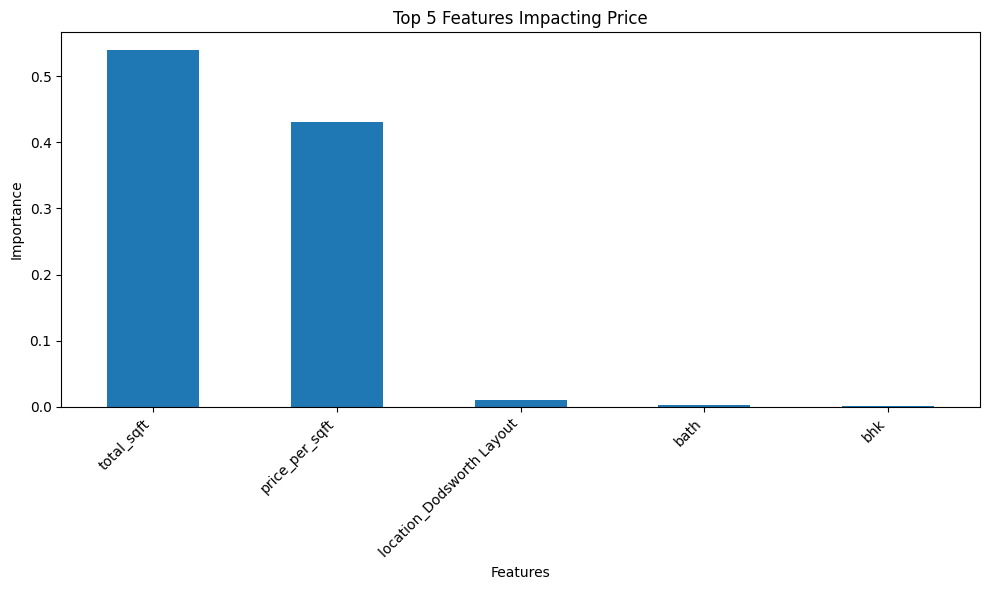

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a pandas Series with feature names and their importances
features = X_train.columns
importance_series = pd.Series(feature_importances, index=features)

# Sort the feature importances in descending order and get the top 5
top_5_features = importance_series.sort_values(ascending=False).head(5)

# Print the top 5 features and their importances
print("Top 5 Features Impacting Price:")
print(top_5_features)

# Visualize the top 5 features
plt.figure(figsize=(10, 6))
top_5_features.plot(kind='bar')
plt.title('Top 5 Features Impacting Price')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#END